In [1]:
#
# Linear Regression Example 1, HDB Prices Estimation ...
#

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline 

C:\Users\sleam\AppData\Local\Continuum\anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
dataset = pd.read_csv("resale-sample.csv")

In [4]:
dataset.shape

(2000, 11)

In [5]:
dataset.describe()

,Unnamed: 0,floor_area_sqm,lease_commence_date,resale_price
count,2000.000000,2000.000000,2000.000000,2000.000000
mean,50160.695000,97.389250,1990.445500,453921.532940
std,28817.097081,24.387528,10.581352,129727.518779
min,24.000000,34.000000,1967.000000,210000.000000
25%,24862.750000,76.000000,1983.000000,360000.000000
50%,49678.500000,97.000000,1988.000000,430000.000000
75%,75137.750000,111.000000,1999.250000,515250.000000
max,100324.000000,179.000000,2013.000000,991000.000000


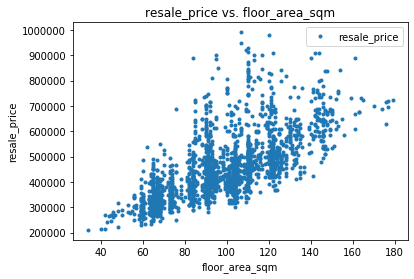

In [6]:
dataset.plot(x='floor_area_sqm', y='resale_price', style='.')  
plt.title('resale_price vs. floor_area_sqm')  
plt.ylabel('resale_price')  
plt.xlabel('floor_area_sqm')  
plt.show()

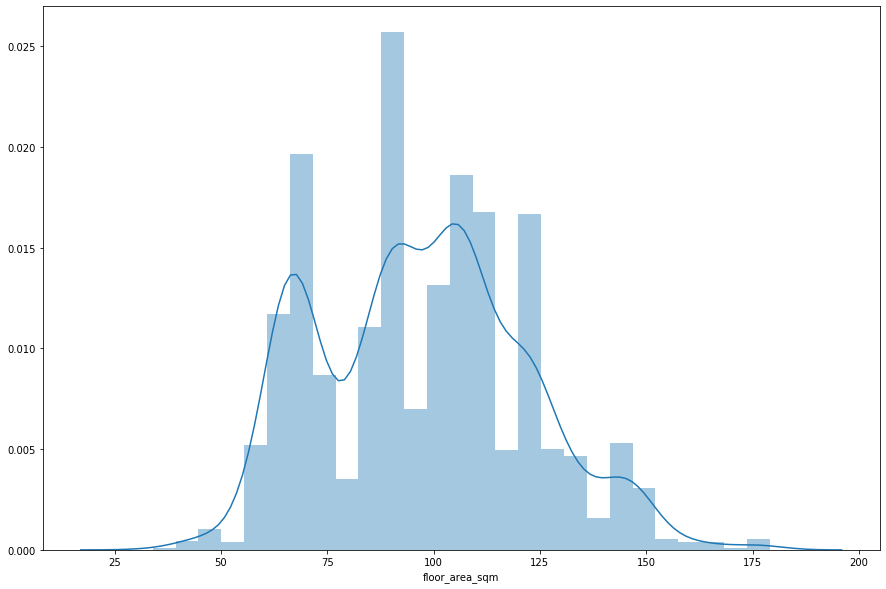

In [7]:
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(dataset['floor_area_sqm'])

In [8]:
X = dataset['floor_area_sqm'].values.reshape(-1,1)
y = dataset['resale_price'].values.reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train) #training the algorithm
#To retrieve the intercept:
print(regressor.intercept_)
#For retrieving the slope:
print(regressor.coef_)

[99200.12048549]
[[3633.15226223]]


In [9]:
y_pred = regressor.predict(X_test)

In [10]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,530000.0,553344.153264
1,280000.0,331721.865268
2,350000.0,397118.605988
3,430000.0,335355.017531
4,363000.0,364420.235628
...,...,...
395,390000.0,477047.955758
396,472000.0,538811.544216
397,440000.0,498846.869331
398,425000.0,542444.696478


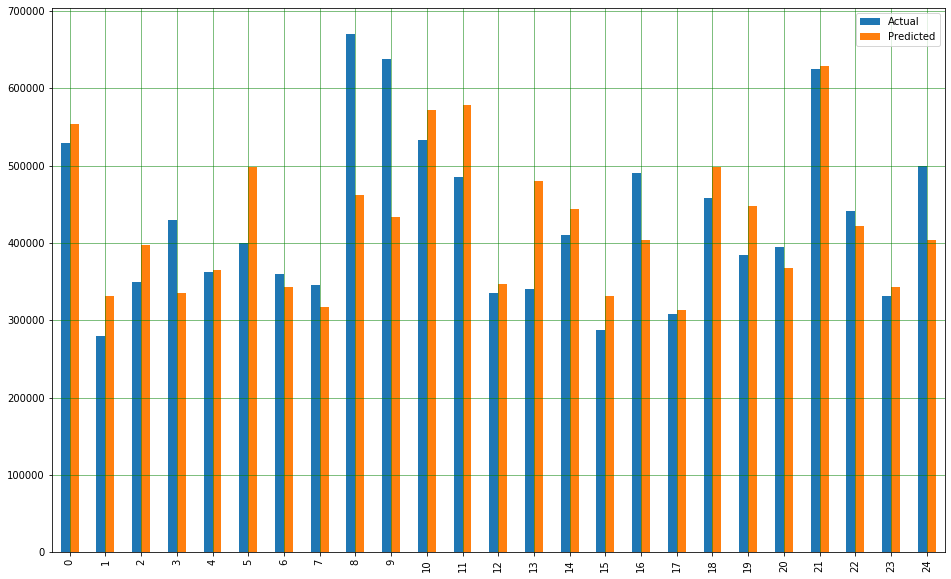

In [11]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

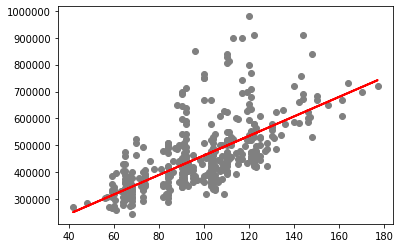

In [12]:
plt.scatter(X_test, y_test,  color='gray')
plt.plot(X_test, y_pred, color='red', linewidth=2)
plt.show()

In [13]:
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 70357.60138898244
Mean Squared Error: 9993072292.213173
Root Mean Squared Error: 99965.35545984506


In [16]:
area = 255.5
aa= np.array([area])
aa = np.reshape(aa,[1,1])
price = regressor.predict(aa)
print('\narea=',area,'\tprice=',price)


area= 255.5 	price= [[1027470.52348566]]
